<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score,confusion_matrix,roc_auc_score

In [28]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [29]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.shape

(7043, 21)

In [30]:
data.isnull().sum().to_frame().rename(columns={0:"No. of Missing Values"})

,No. of Missing Values
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [31]:
data = data.drop(columns = ["customerID"])

In [32]:
for col in data.columns:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])

In [33]:
x = data.drop(columns=["Churn"])
y = data["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [34]:
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [35]:
pred = model.predict(x_test)
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,pred)*100,2),"%")

Accuracy Score of Model on Testing Data  is => 79.44 %


In [36]:
print('Accuracy: %.3f' % accuracy_score(y_test, pred))
print('Precision: %.3f' % precision_score(y_test, pred))
print('Recall: %.3f' % recall_score(y_test, pred))
print('F1 Score: %.3f' % f1_score(y_test,pred))

Accuracy: 0.794
Precision: 0.621
Recall: 0.551
F1 Score: 0.584


In [15]:
import sklearn
roc_auc_score = sklearn.metrics.roc_auc_score(y_test,pred)
cohen = sklearn.metrics.cohen_kappa_score(y_test,pred)
mat = sklearn.metrics.matthews_corrcoef(y_test, pred)
print("ROC-AUC Score: ",roc_auc_score)
print("Cohen Kappa Score: ",cohen)
print("Matthews Correlation Coefficient: ", mat)

ROC-AUC Score:  0.727598806195094
Cohen Kappa Score:  0.4821485771898778
Matthews Correlation Coefficient:  0.4860457645324689


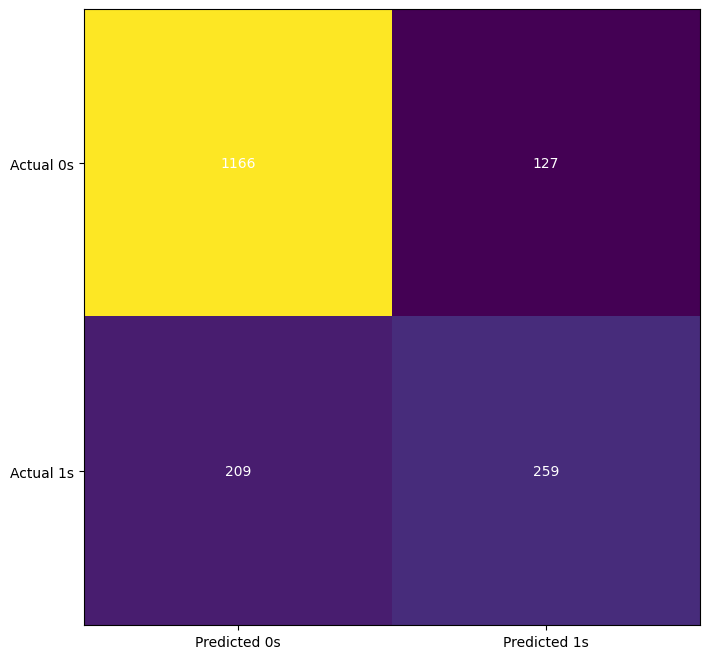

In [16]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

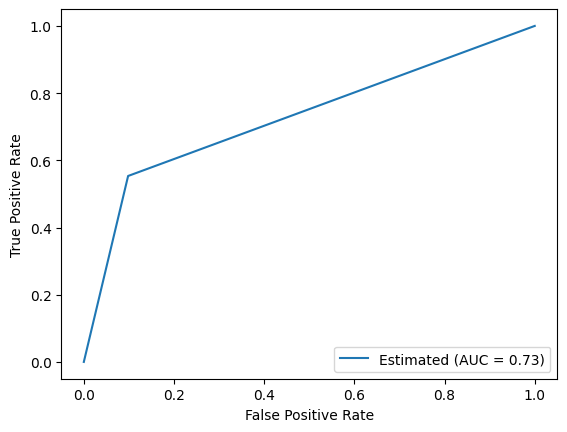

In [17]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, pred)
roc_auc = sklearn.metrics.auc(fpr, tpr)
display = sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Estimated')
display.plot()
plt.show()

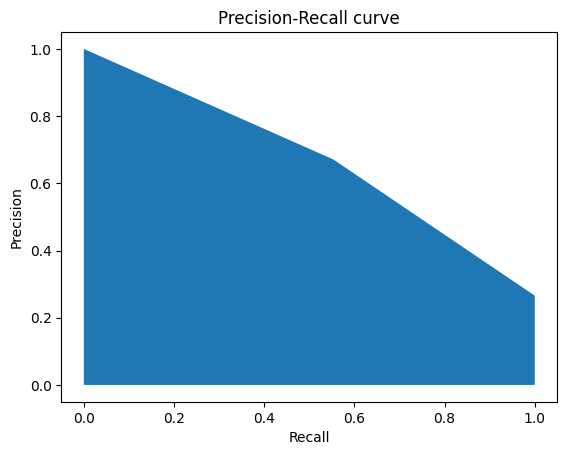

In [18]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, pred)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve")
plt.show()

In [ ]:
loss = sklearn.metrics.log_loss(y_test,pred)
loss

7.204637133997296

In [ ]:
def compute_loss(self, y_test, pred):
    # binary cross entropy
    y_zero_loss = y_true * np.log(y_pred + 1e-9)
    y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)

Text(0, 0.5, 'Loss')

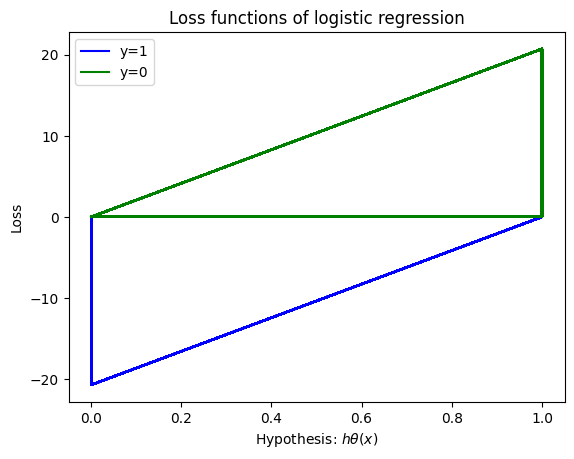

In [19]:
import numpy as np
y1vals = (1-y_test) * np.log(1 - pred + 1e-9)
y0vals = (0-y_test) * np.log(pred + 1e-9)
plt.plot(y_test, y1vals, 'b', label='y=1')
plt.plot(y_test, y0vals, 'g', label='y=0')
plt.title('Loss functions of logistic regression')
plt.legend()
plt.xlabel('Hypothesis: $h\\theta(x)$')
plt.ylabel('Loss')

In [ ]:
phi_z = sigmoid(y_test)

# Plotting the Sigmoid function
#
plt.plot(y_test, phi_z)
plt.axvline(0.0, color='k')
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
#pipe = Pipeline(steps=[('select', SelectKBest(k=2)), ('clf', LogisticRegression())])

In [ ]:
#pipe.fit(x_train, y_train)

Pipeline(steps=[('select', SelectKBest(k=2)), ('clf', LogisticRegression())])

In [37]:
params = [
    {'penalty' : ['11','12','elasticnet','none'],
     'C': np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100,1000,2500,5000]}
]

In [38]:
log = LogisticRegression()

In [ ]:
grid_search = GridSearchCV(log, param_grid=params)
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

In [ ]:
grid_search.best_estimator_

In [ ]:
accuracies = {'train accuracy': grid_search.score(x_train,y_train),
              'test accuracy' : grid_search.score(x_test,y_test)}
print(*accuracies.items())

('train accuracy', 0.7580461946232487) ('test accuracy', 0.7569562748438388)
